In [ ]:
import numpy as np


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [7]:
train = pd.read_csv('/content/train_loan.csv')

In [9]:
test = pd.read_csv('/content/test_loan.csv')

In [10]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [12]:
train.shape

(614, 13)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
test.shape

(367, 12)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#missing value handling

In [18]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#filling the missing values

In [20]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [23]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['Dependents']=train['Dependents'].replace(to_replace="3+", value='4')

In [25]:
train['Dependents'].unique()

array(['0', '1', '2', '4', nan], dtype=object)

In [26]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [29]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [30]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [31]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [35]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [36]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#outliers

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

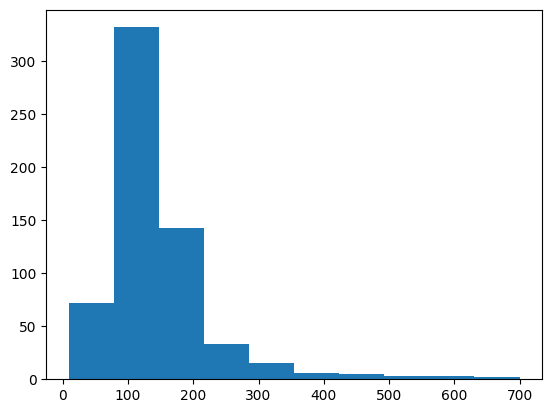

In [37]:
plt.hist(train['LoanAmount'])

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

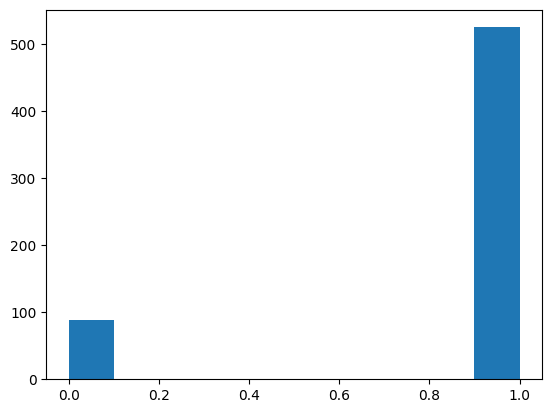

In [38]:
plt.hist(train['Credit_History'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e08b6c59f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7e08b6c5a3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e08b6c59c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7e08b6c5a920>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e08b6c5abc0>],
 'means': []}

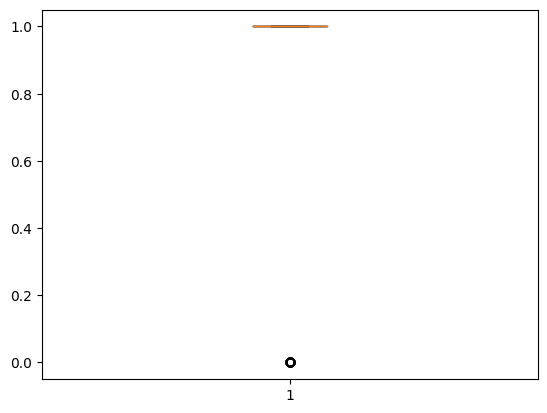

In [39]:
plt.boxplot(train['Credit_History'])

In [ ]:
#Label encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
train['Gender']=le.fit_transform(train['Gender'])

In [43]:
train['Married']=le.fit_transform(train['Married'])

In [44]:
train=pd.get_dummies(train)

In [45]:
train.head()

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Dependents_4,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
1,1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,1,1,3000,0.0,66.0,360.0,1.0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
3,1,1,2583,2358.0,120.0,360.0,1.0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
4,1,0,6000,0.0,141.0,360.0,1.0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
#scaling

In [46]:
train.loc[:,['LoanAmount']]

,LoanAmount
0,128.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc= StandardScaler()

In [49]:
train.loc[:, ['ApplicantIncome','Loan_Amount_Term']]= sc.fit_transform(train[['ApplicantIncome','Loan_Amount_Term']])

In [50]:
train.describe()

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,...,Dependents_4,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,-4.339634e-18,1621.245798,145.752443,5.930833e-17,0.855049,0.001629,0.001629,0.001629,...,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,0.312704,0.687296
std,0.386497,0.476373,1.000815e+00,2926.248369,84.107233,1.000815e+00,0.352339,0.040357,0.040357,0.040357,...,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,0.463973,0.463973
min,0.000000,0.000000,-8.606493e-01,0.000000,9.000000,-5.132498e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,-4.138159e-01,0.000000,100.250000,2.732313e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,-2.606393e-01,1188.500000,128.000000,2.732313e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,6.414426e-02,2297.250000,164.750000,2.732313e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.238462e+01,41667.000000,700.000000,2.137276e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
